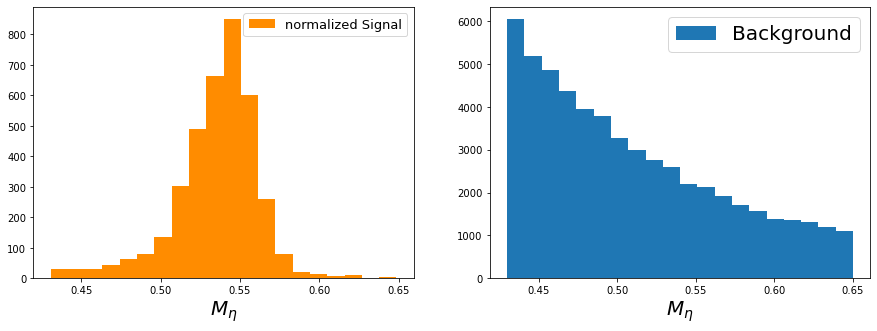

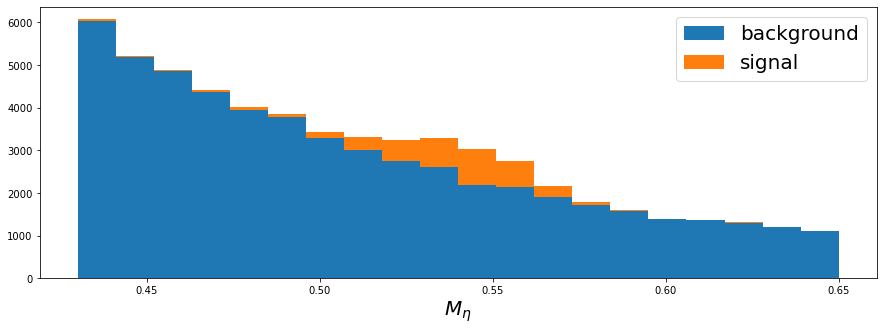

In [2]:
%run /Users/sahargholipour/Documents/MSc_Project/Semileptonic_Bdecay/InvM_eta_sigbkg_hist.ipynb

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import scipy.integrate as integrate
import scipy.stats as stats

from scipy.optimize import curve_fit
from scipy.odr import *
from scipy.odr import models

from numpy import exp, zeros, linspace, array, diff, average, logical_and, argmax

from IPython.display import display, Latex
from __future__ import print_function

form_title = {'family': 'helvetica', 'color': 'black', 'size': 15}
form_label = {'family': 'helvetica', 'color': 'black', 'size': 20}

# Function of splitting the signal and background
exec(open('functions.py').read())

# Data preparation

In [2]:
# No charged particles in ROE form this data set
data = pd.read_pickle('semileptonic_Bdecay_data.pkl')

In [3]:
%%time
# SB areas were also added
# eta
dfp_eta, rec_modep_eta, gen_modep_eta = sig_bkg_spliter('charged','eta', data)
df0_eta, rec_mode0_eta, gen_mode0_eta = sig_bkg_spliter('mixed','eta',data)
df_eta = pd.concat([dfp_eta,df0_eta])

# pi0
dfp_pi0, rec_modep_pi0, gen_modep_pi0 = sig_bkg_spliter('charged','pi0', data)
df0_pi0, rec_mode0_pi0, gen_mode0_pi0 = sig_bkg_spliter('mixed','pi0',data)
df_pi0 = pd.concat([dfp_pi0,df0_pi0])

CPU times: user 3.39 s, sys: 7.92 s, total: 11.3 s
Wall time: 16.7 s


In [4]:
display(Latex(rf'''$rec \ mode \ \eta \ B^0: {rec_mode0_eta}
\\ rec \ mode \ \pi^0 \ B^0: {rec_mode0_pi0}
\\ rec \ mode \ \eta \ B^+: {rec_modep_eta}
\\ rec \ mode \ \pi^0 \ B^+: {rec_modep_pi0}
\\ {'-' * 30}
\\ gen \ mode \ \eta \ B^0: {gen_mode0_eta}
\\ gen \ mode \ \pi^0 \ B^0: {gen_mode0_pi0}
\\ gen \ mode \ \eta \ B^+: {gen_modep_eta}
\\ gen \ mode \ \pi^0 \ B^+: {gen_modep_pi0}$
'''
))

<IPython.core.display.Latex object>

## Taking the invariant mass of $\eta$ from the table of data

In [5]:
# Note: signal is the combination of signal and peaking background

# Invariant mass of eta: signal + peaking background of both B0 and B1
eta_sig_InvM = pd.concat(
    [
        df_eta.loc['signal']['pi4_B0_InvM'],df_eta.loc['signal']['pi4_B1_InvM'],
        df_eta.loc['peaking background']['pi4_B0_InvM'],df_eta.loc['peaking background']['pi4_B1_InvM']
    ]
)
# Invariant mass of eta: combinatorial background of both B0 and B1
eta_bkg_InvM = pd.concat(
    [
        df_eta.loc['combinatorial background']['pi4_B0_InvM'],
        df_eta.loc['combinatorial background']['pi4_B1_InvM']
    ]
)


# taking half of the background
eta_half1_bkg = pd.concat(
    [
        df_eta.loc['combinatorial background'].iloc[:28021,:]['pi4_B0_InvM'],
        df_eta.loc['combinatorial background'].iloc[:28021,:]['pi4_B1_InvM']
    ]
)

eta_half2_bkg = pd.concat(
    [
        df_eta.loc['combinatorial background'].iloc[28022:,:]['pi4_B0_InvM'],
        df_eta.loc['combinatorial background'].iloc[28022:,:]['pi4_B1_InvM']
    ]
)

## Taking the invariant mass of $\pi^0$ from the table of data

In [6]:
# Note: signal is the combination of signal and peaking background

# Invariant mass of pi0: signal + peaking background of both B0 and B1
pi0_sig_InvM = pd.concat(
    [
        df_pi0.loc['signal']['pi4_B0_InvM'],df_pi0.loc['signal']['pi4_B1_InvM'],
        df_pi0.loc['peaking background']['pi4_B0_InvM'],df_pi0.loc['peaking background']['pi4_B1_InvM']
    ]
)
# Invariant mass of eta: combinatorial background of both B0 and B1
pi0_bkg_InvM = pd.concat(
    [
        df_pi0.loc['combinatorial background']['pi4_B0_InvM'],
        df_pi0.loc['combinatorial background']['pi4_B1_InvM']
    ]
)


# taking half of the background
pi0_half1_bkg = pd.concat(
    [
        df_pi0.loc['combinatorial background'].iloc[:49309,:]['pi4_B0_InvM'],
        df_pi0.loc['combinatorial background'].iloc[:49309,:]['pi4_B1_InvM']
    ]
)

pi0_half2_bkg = pd.concat(
    [
        df_pi0.loc['combinatorial background'].iloc[49310:,:]['pi4_B0_InvM'],
        df_pi0.loc['combinatorial background'].iloc[49310:,:]['pi4_B1_InvM']
    ]
)

In [7]:
len(df_pi0.loc['combinatorial background']), len(eta_bkg_InvM.dropna())

(98619, 56043)

## Plots of $M_{\eta}$ and $M_{\pi^0}$

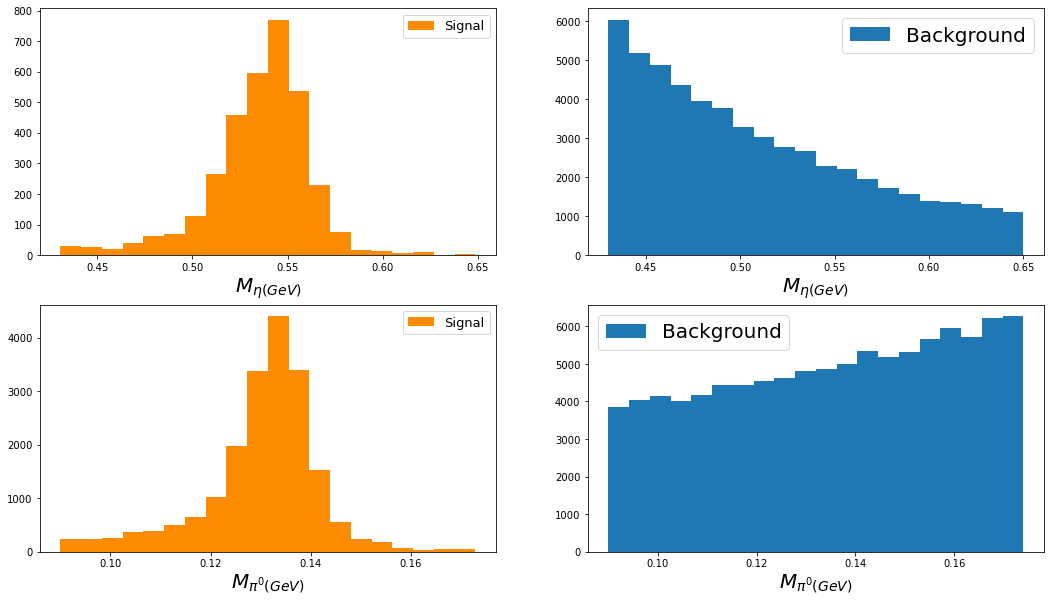

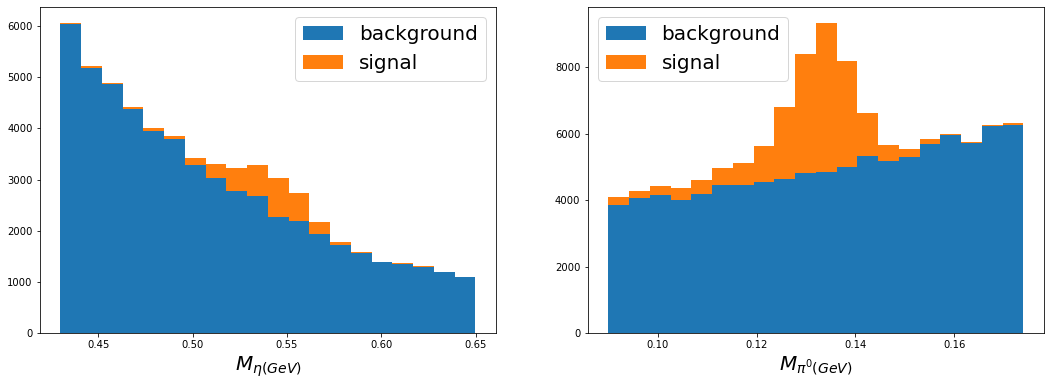

In [15]:
# data invariant mass of eta signal (signal + peaking background)
eta_data_sig = eta_sig_InvM.dropna()
eta_data_bkg = eta_bkg_InvM.dropna()

# data invariant mass of pi0 signal (signal + peaking background)
pi0_data_sig = pi0_sig_InvM.dropna()
pi0_data_bkg = pi0_bkg_InvM.dropna()

# eta signal and background seperately
plt.figure(figsize=(18, 10))
plt.subplot(221)
eta_counts_sig, eta_edges, _ = plt.hist(eta_data_sig, bins=20, label='Signal', color='darkorange')
plt.xlabel('$M_{\eta (GeV)}$', fontdict=form_label)
plt.legend(fontsize=13)

plt.subplot(222)
eta_counts_bkg, eta_edges, _ = plt.hist(eta_data_bkg, bins=20, label='Background')
plt.xlabel('$M_{\eta (GeV)}$', fontdict=form_label)
plt.legend(fontsize=20)

# pi0 signal and background seperately
plt.subplot(223)
pi0_counts_sig, pi0_edges, _ = plt.hist(pi0_data_sig, bins=20, label='Signal', color='darkorange')
plt.xlabel('$M_{\pi^0 (GeV)}$', fontdict=form_label)
plt.legend(fontsize=13)

plt.subplot(224)
pi0_counts_bkg, pi0_edges, _ = plt.hist(pi0_data_bkg, bins=20, label='Background')
plt.xlabel('$M_{\pi^0 (GeV)}$', fontdict=form_label)
plt.legend(fontsize=20)

# eta signal and background
plt.figure(figsize=(18,6))
plt.subplot(121)
eta_counts, eta_edges, _ = plt.hist([eta_data_bkg, eta_data_sig], bins=20, label=['background', 'signal'], histtype='barstacked')
plt.xlabel('$M_{\eta (GeV)}$', fontdict=form_label)
plt.legend(fontsize=20)

# pi0 signal and background
plt.subplot(122)
pi0_counts, pi0_edges, _ = plt.hist([pi0_data_bkg, pi0_data_sig], bins=20, label=['background', 'signal'], histtype='barstacked')
plt.xlabel('$M_{\pi^0 (GeV)}$', fontdict=form_label)
plt.legend(fontsize=20)

# making the size of x and y data the same
eta_y_data = eta_counts[0]+ (eta_counts[1]-eta_counts[0])
eta_x_data = (eta_edges[:-1] + eta_edges[1:]) / 2
eta_yerr = np.sqrt(eta_y_data)

pi0_y_data = pi0_counts[0]+(pi0_counts[1]-pi0_counts[0])
pi0_x_data = (pi0_edges[:-1] + pi0_edges[1:]) / 2
pi0_yerr = np.sqrt(pi0_y_data)

## Half of the background for both $M_{\eta}$ and $M_{\pi^0}$

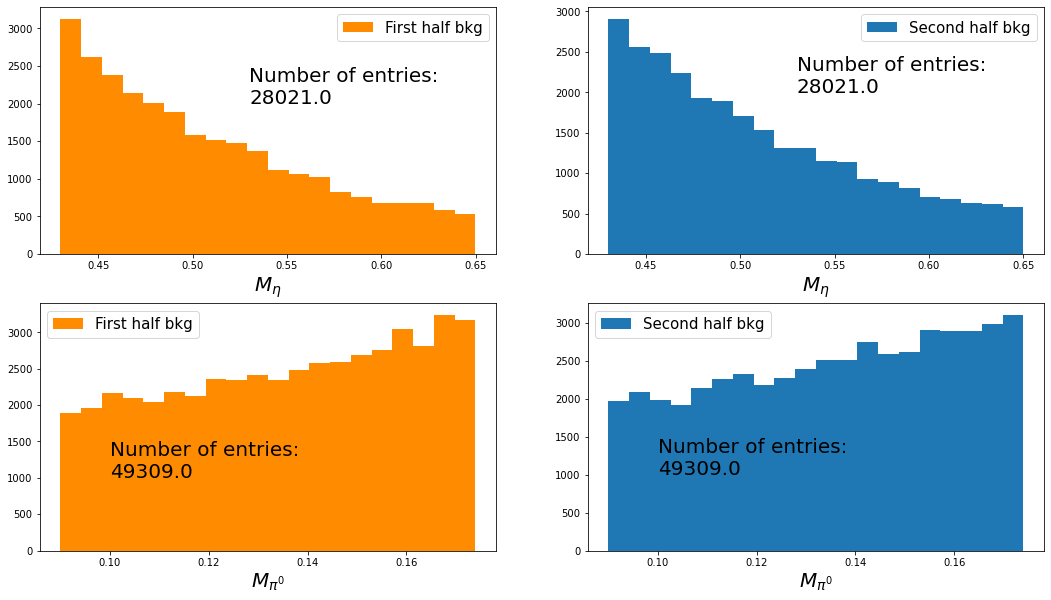

In [134]:
# data invariant mass of eta signal (signal + peaking background)
eta_half1 = eta_half1_bkg.dropna()
eta_half2 = eta_half2_bkg.dropna()

pi0_half1 = pi0_half1_bkg.dropna()
pi0_half2 = pi0_half2_bkg.dropna()

# eta half of the background
plt.figure(figsize=(18,10))
plt.subplot(221)
eta_counts_bkg1, eta_edges1, _ = plt.hist(eta_half1, bins=20, label='First half bkg', color='darkorange')
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.text(0.53,2000, f'Number of entries:\n{np.sum(eta_counts_bkg1)}', fontsize=20)
plt.legend(fontsize=15)

plt.subplot(222)
eta_counts_bkg2, eta_edges2, _ = plt.hist(eta_half2, bins=20, label='Second half bkg')
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.text(0.53,2000, f'Number of entries:\n{np.sum(eta_counts_bkg2)}', fontsize=20)
plt.legend(fontsize=15)

# pi0 half of the background
plt.subplot(223)
pi0_counts_bkg1, pi0_edges1, _ = plt.hist(pi0_half1, bins=20, label='First half bkg', color='darkorange')
plt.xlabel('$M_{\pi^0}$', fontdict=form_label)
plt.text(0.1,1000, f'Number of entries:\n{np.sum(pi0_counts_bkg1)}', fontsize=20)
plt.legend(fontsize=15)

plt.subplot(224)
pi0_counts_bkg2, pi0_edges2, _ = plt.hist(pi0_half2, bins=20, label='Second half bkg')
plt.xlabel('$M_{\pi^0}$', fontdict=form_label)
plt.text(0.1,1000, f'Number of entries:\n{np.sum(pi0_counts_bkg2)}', fontsize=20)
plt.legend(fontsize=15)

# Background

## Comparing the performance of curve_fit and ODR package

Note: The square of the diagnol in covariance matrix should give you the standard error. However in ODR package it doesn't so you sould multiply the matrix with residual variance as well.

In other words, `np.sqrt(np.diag(output.cov_beta * output.res_var))` will give you the same result as output.sd_beta.[here](https://stackoverflow.com/questions/41028846/how-to-compute-standard-error-from-odr-results)

<p>&nbsp;</p>

__Measuring the $\chi^2$ in curve_fit:__
By calling `full_output=True` in curve_fit, it will return extra information about the fit. So, `err = np.dot(info['fvec'], info['fvec'])` this will give you the sum of residual squared (`info['fvec']` includes the residuals). Then, by passing `sigma=yerr_bkg` to curve_fit you're givving the uncertainty on data points which then the err will be the $\chi^2$.

<font color='blue'>Note: by `full_output=True` you can't use the arguments to give ranges for the initial values!

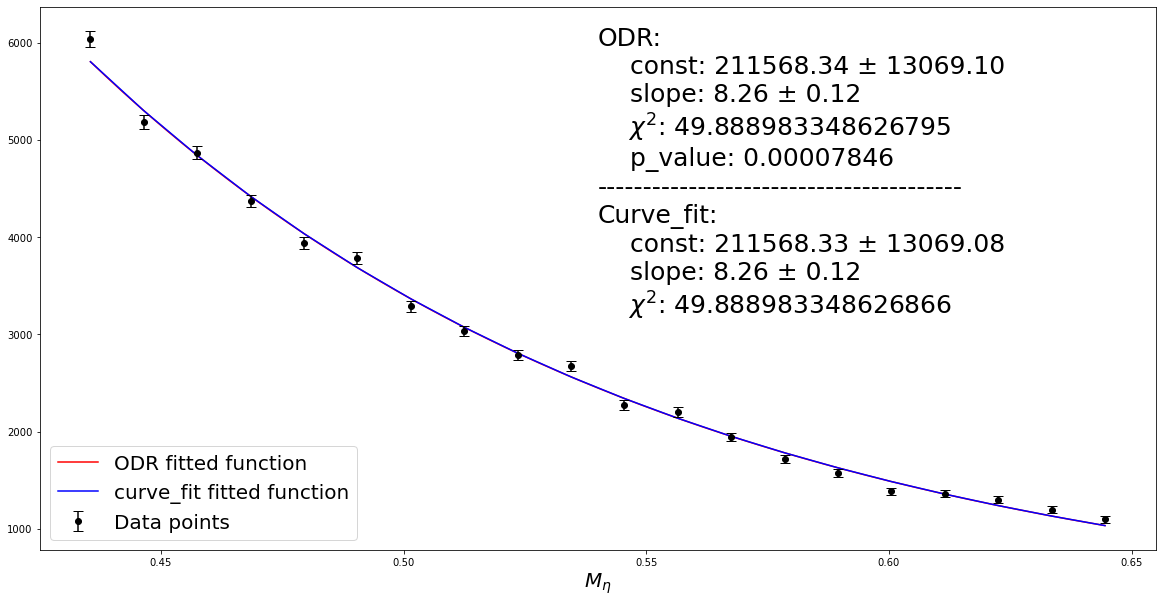

In [9]:
# eta
import warnings
warnings.filterwarnings('ignore')

eta_x_bkg = np.array((eta_edges[:-1]+eta_edges[1:])/2)
eta_y_bkg = np.array(eta_counts_bkg)
eta_yerr_bkg = np.sqrt(eta_y_bkg)

# more bins (increase the number of data points)
# x_bkg2 = np.array((bin_edge[:-1]+bin_edge[1:])/2)
# y_bkg2 = np.array(bin_value)

(eta_xf_bkg,eta_yf_bkg),eta_parameters_bkg,eta_errors_bkg,eta_covp_bkg,eta_chi_bkg, eta_res_var_bkg = fit(expo, eta_x_bkg,eta_y_bkg, eta_yerr_bkg)
eta_popt, eta_pcov ,eta_info, eta_msg, eta_ier= curve_fit(
    expo2,eta_x_bkg,eta_y_bkg, full_output=True, p0=[200000, 8], sigma=eta_yerr_bkg
)

plt.figure(figsize=(20,10))
# plt.plot(x_bkg,y_bkg, 'b.', label='signal')
plt.plot(eta_xf_bkg,eta_yf_bkg, color='r', label='ODR fitted function')
plt.plot(eta_x_bkg,expo2(eta_x_bkg, *eta_popt), color='b', label='curve_fit fitted function')
plt.errorbar(eta_x_bkg, eta_y_bkg, yerr=eta_yerr_bkg, ls='', color='k', fmt='o', capsize=5, label='Data points')
plt.text( 0.54,2900,
f'''ODR:
    const: {eta_parameters_bkg[0]:.2f} \u00B1 {eta_errors_bkg[0]:.2f}
    slope: {eta_parameters_bkg[1]:.2f} \u00B1 {eta_errors_bkg[1]:.2f}
    $\chi^2$: {eta_chi_bkg}
    p_value: {1 - stats.chi2.cdf(eta_chi_bkg, 18):.8f}\n{'-'*40}
Curve_fit:
    const: {eta_popt[0]:.2f} \u00B1 {np.sqrt(np.diag(eta_pcov)[0]):.2f}
    slope: {eta_popt[1]:.2f} \u00B1 {np.sqrt(np.diag(eta_pcov)[1]):.2f}
    $\chi^2$: {np.dot(eta_info['fvec'], eta_info['fvec'])}
    '''
    ,fontsize=25
)
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.legend(fontsize='20', loc='lower left')

# eta_pcov, eta_covp_bkg

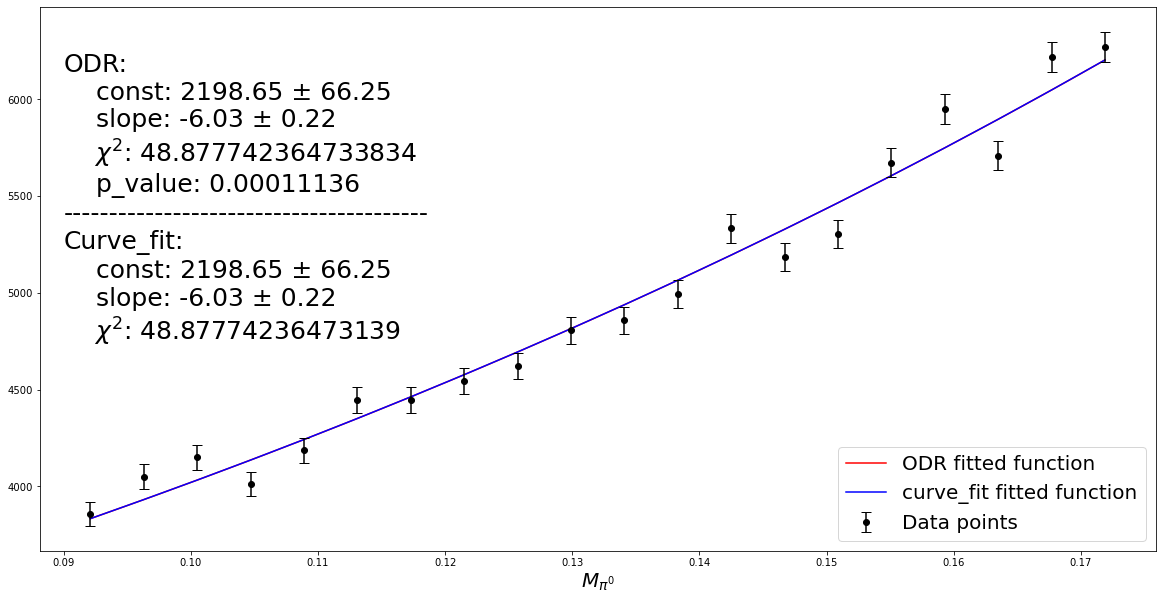

In [132]:
# pi0
import warnings
warnings.filterwarnings('ignore')

pi0_x_bkg = np.array((pi0_edges[:-1]+pi0_edges[1:])/2)
pi0_y_bkg = np.array(pi0_counts_bkg)
pi0_yerr_bkg = np.sqrt(pi0_y_bkg)

# more bins (increase the number of data points)
# x_bkg2 = np.array((bin_edge[:-1]+bin_edge[1:])/2)
# y_bkg2 = np.array(bin_value)

(pi0_xf_bkg,pi0_yf_bkg),pi0_parameters_bkg,pi0_errors_bkg,pi0_covp_bkg,pi0_chi_bkg, pi0_res_var_bkg = fit(expo, pi0_x_bkg,pi0_y_bkg, pi0_yerr_bkg)
pi0_popt, pi0_pcov ,pi0_info, pi0_msg, pi0_ier= curve_fit(
    expo2,pi0_x_bkg,pi0_y_bkg, full_output=True, p0=[2000, -8], sigma=pi0_yerr_bkg
)

plt.figure(figsize=(20,10))
# plt.plot(x_bkg,y_bkg, 'b.', label='signal')
plt.plot(pi0_xf_bkg,pi0_yf_bkg, color='r', label='ODR fitted function')
plt.plot(pi0_x_bkg,expo2(pi0_x_bkg, *pi0_popt), color='b', label='curve_fit fitted function')
plt.errorbar(pi0_x_bkg, pi0_y_bkg, yerr=pi0_yerr_bkg, ls='', color='k', fmt='o', capsize=5, label='Data points')
plt.text( 0.09,4600,
f'''ODR:
    const: {pi0_parameters_bkg[0]:.2f} \u00B1 {pi0_errors_bkg[0]:.2f}
    slope: {pi0_parameters_bkg[1]:.2f} \u00B1 {pi0_errors_bkg[1]:.2f}
    $\chi^2$: {pi0_chi_bkg}
    p_value: {1 - stats.chi2.cdf(pi0_chi_bkg, 18):.8f}\n{'-'*40}
Curve_fit:
    const: {pi0_popt[0]:.2f} \u00B1 {np.sqrt(np.diag(pi0_pcov)[0]):.2f}
    slope: {pi0_popt[1]:.2f} \u00B1 {np.sqrt(np.diag(pi0_pcov)[1]):.2f}
    $\chi^2$: {np.dot(pi0_info['fvec'], pi0_info['fvec'])}
    '''
    ,fontsize=25
)
plt.xlabel('$M_{\pi^0}$', fontdict=form_label)
plt.legend(fontsize='20', loc='lower right')

# pi0_pcov, pi0_covp_bkg

## comparing the first and the second half of the background using ODR

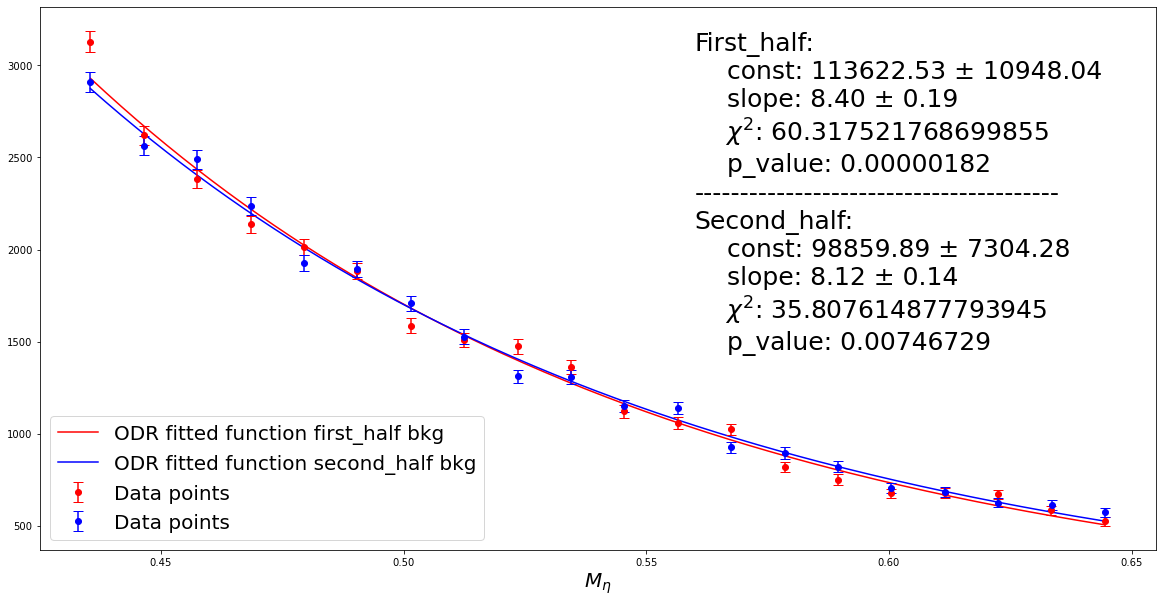

In [140]:
# eta
import warnings
warnings.filterwarnings('ignore')

eta_x_bkg1 = np.array((eta_edges1[:-1]+eta_edges1[1:])/2)
eta_y_bkg1 = np.array(eta_counts_bkg1)
eta_yerr_bkg1 = np.sqrt(eta_y_bkg1)

eta_x_bkg2 = np.array((eta_edges2[:-1]+eta_edges2[1:])/2)
eta_y_bkg2 = np.array(eta_counts_bkg2)
eta_yerr_bkg2 = np.sqrt(eta_y_bkg2)

(eta_xf_bkg1,eta_yf_bkg1),eta_parameters_bkg1,eta_errors_bkg1,eta_covp_bkg1,eta_chi_bkg1, eta_res_var_bkg1 = fit(expo, eta_x_bkg1,eta_y_bkg1, eta_yerr_bkg1)
(eta_xf_bkg2,eta_yf_bkg2),eta_parameters_bkg2,eta_errors_bkg2,eta_covp_bkg2,eta_chi_bkg2, eta_res_var_bkg2 = fit(expo, eta_x_bkg2,eta_y_bkg2, eta_yerr_bkg2)

plt.figure(figsize=(20,10))
plt.plot(eta_xf_bkg1,eta_yf_bkg1, color='r', label='ODR fitted function first_half bkg')
plt.plot(eta_xf_bkg2,eta_yf_bkg2, color='b', label='ODR fitted function second_half bkg')

plt.errorbar(eta_x_bkg1, eta_y_bkg1, yerr=eta_yerr_bkg1, ls='', color='r', fmt='o', capsize=5, label='Data points')
plt.errorbar(eta_x_bkg2, eta_y_bkg2, yerr=eta_yerr_bkg2, ls='', color='b', fmt='o', capsize=5, label='Data points')

plt.text( 0.56,1300,
f'''First_half:
    const: {eta_parameters_bkg1[0]:.2f} \u00B1 {eta_errors_bkg1[0]:.2f}
    slope: {eta_parameters_bkg1[1]:.2f} \u00B1 {eta_errors_bkg1[1]:.2f}
    $\chi^2$: {eta_chi_bkg1}
    p_value: {1 - stats.chi2.cdf(eta_chi_bkg1, 18):.8f} \n{'-'*40}
Second_half:
    const: {eta_parameters_bkg2[0]:.2f} \u00B1 {eta_errors_bkg2[0]:.2f}
    slope: {eta_parameters_bkg2[1]:.2f} \u00B1 {eta_errors_bkg2[1]:.2f}
    $\chi^2$: {eta_chi_bkg2}
    p_value: {1 - stats.chi2.cdf(eta_chi_bkg2, 18):.8f}
    '''
    ,fontsize=25
)

plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.legend(fontsize='20', loc='lower left')


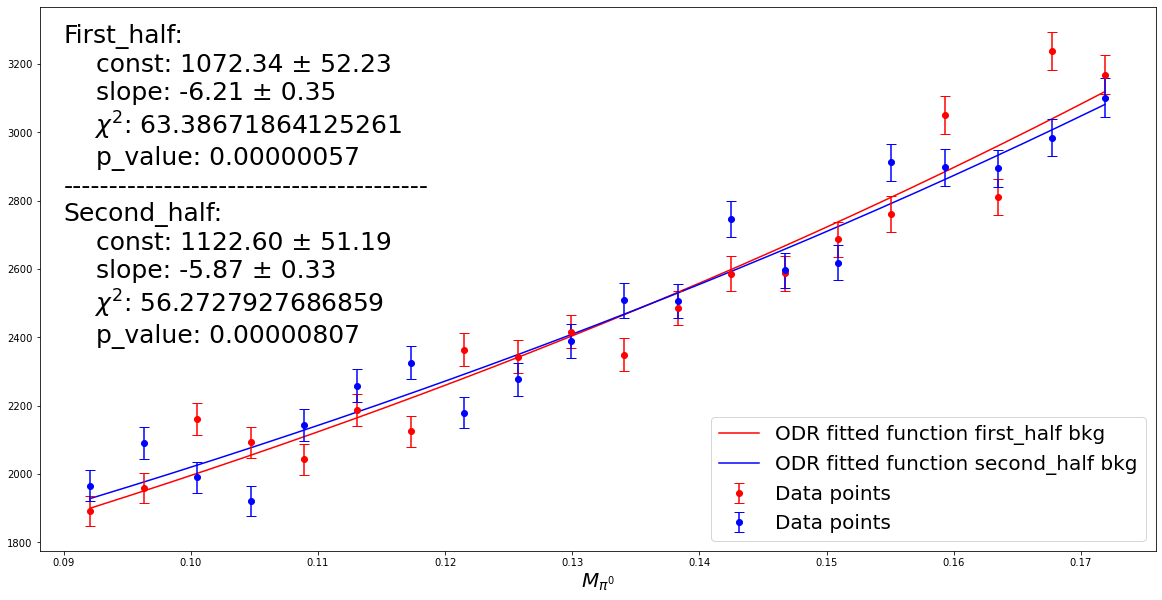

In [137]:
# pi0
import warnings
warnings.filterwarnings('ignore')

pi0_x_bkg1 = np.array((pi0_edges1[:-1]+pi0_edges1[1:])/2)
pi0_y_bkg1 = np.array(pi0_counts_bkg1)
pi0_yerr_bkg1 = np.sqrt(pi0_y_bkg1)

pi0_x_bkg2 = np.array((pi0_edges2[:-1]+pi0_edges2[1:])/2)
pi0_y_bkg2 = np.array(pi0_counts_bkg2)
pi0_yerr_bkg2 = np.sqrt(pi0_y_bkg2)

(pi0_xf_bkg1,pi0_yf_bkg1),pi0_parameters_bkg1,pi0_errors_bkg1,pi0_covp_bkg1,pi0_chi_bkg1, pi0_res_var_bkg1 = fit(expo, pi0_x_bkg1,pi0_y_bkg1, pi0_yerr_bkg1)
(pi0_xf_bkg2,pi0_yf_bkg2),pi0_parameters_bkg2,pi0_errors_bkg2,pi0_covp_bkg2,pi0_chi_bkg2, pi0_res_var_bkg2 = fit(expo, pi0_x_bkg2,pi0_y_bkg2, pi0_yerr_bkg2)

plt.figure(figsize=(20,10))
plt.plot(pi0_xf_bkg1,pi0_yf_bkg1, color='r', label='ODR fitted function first_half bkg')
plt.plot(pi0_xf_bkg2,pi0_yf_bkg2, color='b', label='ODR fitted function second_half bkg')

plt.errorbar(pi0_x_bkg1, pi0_y_bkg1, yerr=pi0_yerr_bkg1, ls='', color='r', fmt='o', capsize=5, label='Data points')
plt.errorbar(pi0_x_bkg2, pi0_y_bkg2, yerr=pi0_yerr_bkg2, ls='', color='b', fmt='o', capsize=5, label='Data points')

plt.text( 0.09,2300,
f'''First_half:
    const: {pi0_parameters_bkg1[0]:.2f} \u00B1 {pi0_errors_bkg1[0]:.2f}
    slope: {pi0_parameters_bkg1[1]:.2f} \u00B1 {pi0_errors_bkg1[1]:.2f}
    $\chi^2$: {pi0_chi_bkg1}
    p_value: {1 - stats.chi2.cdf(pi0_chi_bkg1, 18):.8f} \n{'-'*40}
Second_half:
    const: {pi0_parameters_bkg2[0]:.2f} \u00B1 {pi0_errors_bkg2[0]:.2f}
    slope: {pi0_parameters_bkg2[1]:.2f} \u00B1 {pi0_errors_bkg2[1]:.2f}
    $\chi^2$: {pi0_chi_bkg2}
    p_value: {1 - stats.chi2.cdf(pi0_chi_bkg2, 18):.8f}
    '''
    ,fontsize=25
)

plt.xlabel('$M_{\pi^0}$', fontdict=form_label)
plt.legend(fontsize='20', loc='lower right')


## comparing exponential with a polynomial function with 5 parameters, testing on $M{\eta}$

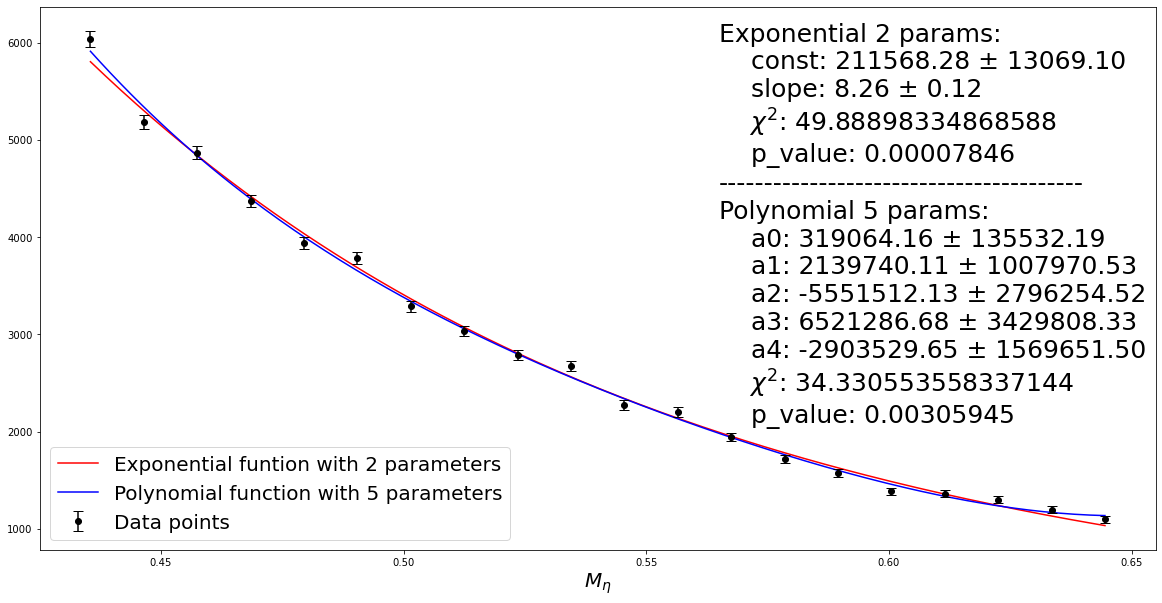

In [65]:
import warnings
warnings.filterwarnings('ignore')


(eta_xf_bkg,eta_yf_bkg),eta_parameters_bkg,eta_errors_bkg,eta_covp_bkg,eta_chi_bkg, eta_res_var_bkg = fit(expo, eta_x_bkg,eta_y_bkg, eta_yerr_bkg)
(eta_xf_bkg_pol,eta_yf_bkg_pol),eta_parameters_bkg_pol,eta_errors_bkg_pol,eta_covp_bkg_pol,eta_chi_bkg_pol, eta_res_var_bkg_pol = fit(polynomial, eta_x_bkg,eta_y_bkg, eta_yerr_bkg)

plt.figure(figsize=(20,10))
# plt.plot(x_bkg,y_bkg, 'b.', label='signal')
plt.plot(eta_xf_bkg,eta_yf_bkg, color='r', label='Exponential funtion with 2 parameters')
plt.plot(eta_xf_bkg_pol,eta_yf_bkg_pol, color='b', label='Polynomial function with 5 parameters')
plt.errorbar(eta_x_bkg, eta_y_bkg, yerr=eta_yerr_bkg, ls='', color='k', fmt='o', capsize=5, label='Data points')
plt.text( 0.565,1800,
f'''Exponential 2 params:
    const: {eta_parameters_bkg[0]:.2f} \u00B1 {eta_errors_bkg[0]:.2f}
    slope: {eta_parameters_bkg[1]:.2f} \u00B1 {eta_errors_bkg[1]:.2f}
    $\chi^2$: {eta_chi_bkg}
    p_value: {1 - stats.chi2.cdf(eta_chi_bkg, 18):.8f}\n{'-'*40}
Polynomial 5 params:
    a0: {eta_parameters_bkg_pol[0]:.2f} \u00B1 {eta_errors_bkg_pol[0]:.2f}
    a1: {eta_parameters_bkg_pol[1]:.2f} \u00B1 {eta_errors_bkg_pol[1]:.2f}
    a2: {eta_parameters_bkg_pol[2]:.2f} \u00B1 {eta_errors_bkg_pol[2]:.2f}
    a3: {eta_parameters_bkg_pol[3]:.2f} \u00B1 {eta_errors_bkg_pol[3]:.2f}
    a4: {eta_parameters_bkg_pol[4]:.2f} \u00B1 {eta_errors_bkg_pol[4]:.2f}
    $\chi^2$: {eta_chi_bkg_pol}
    p_value: {1 - stats.chi2.cdf(eta_chi_bkg_pol, 15):.8f}
    '''
    ,fontsize=25
)
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.legend(fontsize='20', loc='lower left')


## correlation matrix between parameters, checking how it willbe affected by shifting x value <br>(x-0.5)

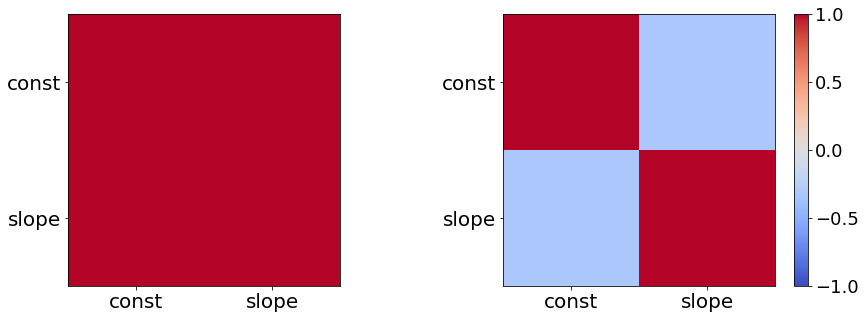

In [14]:
std_devs_curvefit = np.sqrt(np.diag(eta_pcov))
correlation_matrix_curvefit = eta_pcov / np.outer(std_devs_curvefit, std_devs_curvefit)

std_devs_ODR = np.sqrt(np.diag(eta_covp_bkg * eta_res_var_bkg))
correlation_matrix_ODR = (eta_covp_bkg * eta_res_var_bkg) / np.outer(std_devs_ODR, std_devs_ODR)

l = ['const', 'slope']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(correlation_matrix_curvefit, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(2), l, fontsize=20)
plt.yticks(np.arange(2), l, fontsize=20)

plt.subplot(122)
plt.imshow(correlation_matrix_ODR, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(2), l, fontsize=20)
plt.yticks(np.arange(2), l, fontsize=20)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.show()

## checking the metrics of the model

### Residual plot

In [61]:
# Calculate the chi-square statistic manually (ODR fitting result)
eta_residual_bkg = eta_y_bkg - expo(eta_parameters_bkg, eta_x_bkg)
eta_normalized_residuals = eta_residual_bkg / eta_yerr_bkg
np.sum(eta_normalized_residuals**2)

49.8889833487132

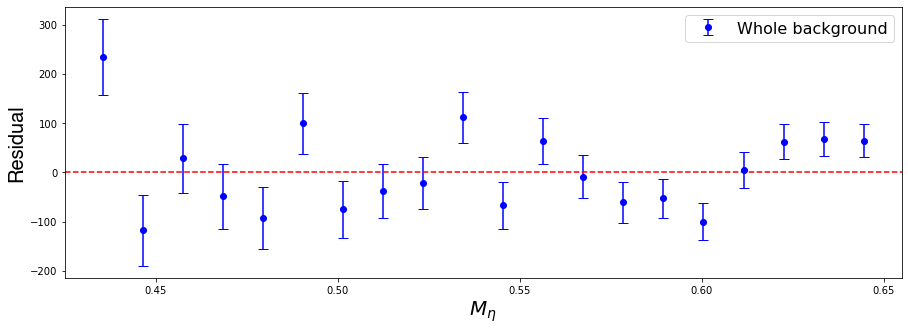

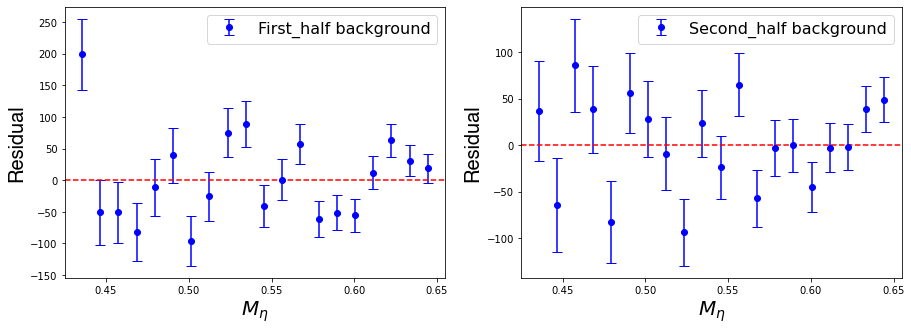

In [147]:
# ODR result
# background eta
eta_residual_bkg = eta_y_bkg - expo(eta_parameters_bkg, eta_x_bkg)

# half background
eta_residual_bkg1 = eta_y_bkg1 - expo(eta_parameters_bkg1, eta_x_bkg1)
eta_residual_bkg2 = eta_y_bkg2 - expo(eta_parameters_bkg2, eta_x_bkg2)

plt.figure(figsize=(15,5))
# plt.scatter(x_bkg, residual)
plt.errorbar(eta_x_bkg, eta_residual_bkg, yerr=eta_yerr_bkg, ls='', color='b', fmt='o', capsize=5, label='Whole background')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("$M_{\eta}$", fontdict=form_label)
plt.ylabel("Residual", fontdict=form_label)
plt.legend(fontsize=16)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.errorbar(eta_x_bkg1, eta_residual_bkg1, yerr=eta_yerr_bkg1, ls='', color='b', fmt='o', capsize=5, label='First_half background')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("$M_{\eta}$", fontdict=form_label)
plt.ylabel("Residual", fontdict=form_label)
plt.legend(fontsize=16)

plt.subplot(122)
plt.errorbar(eta_x_bkg2, eta_residual_bkg2, yerr=eta_yerr_bkg2, ls='', color='b', fmt='o', capsize=5, label='Second_half background')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("$M_{\eta}$", fontdict=form_label)
plt.ylabel("Residual", fontdict=form_label)
plt.legend(fontsize=16)

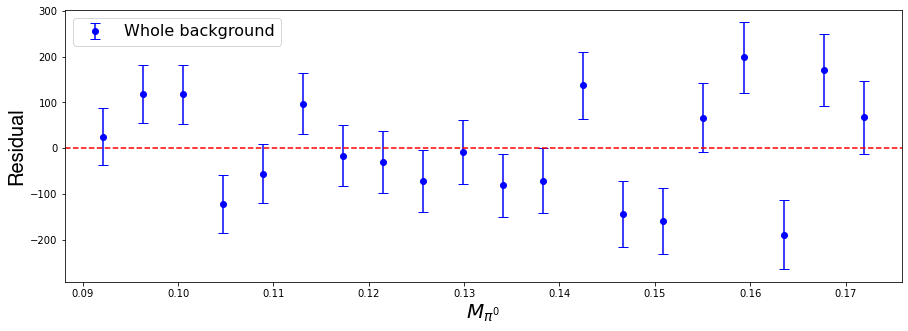

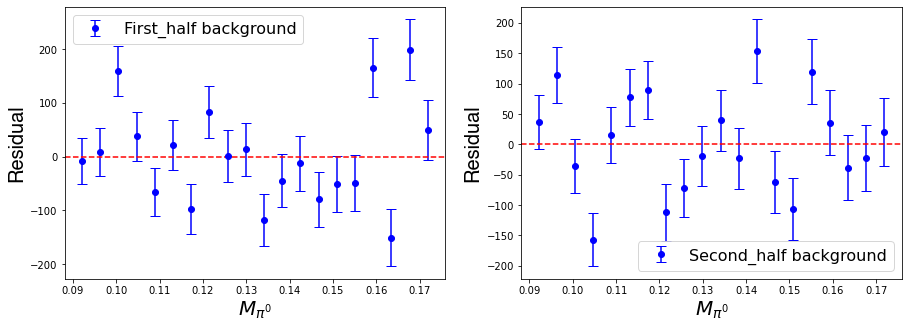

In [142]:
# ODR result
# background pi0
pi0_residual_bkg = pi0_y_bkg - expo(pi0_parameters_bkg, pi0_x_bkg)

# half background
pi0_residual_bkg1 = pi0_y_bkg1 - expo(pi0_parameters_bkg1, pi0_x_bkg1)
pi0_residual_bkg2 = pi0_y_bkg2 - expo(pi0_parameters_bkg2, pi0_x_bkg2)

plt.figure(figsize=(15,5))
# plt.scatter(x_bkg, residual)
plt.errorbar(pi0_x_bkg, pi0_residual_bkg, yerr=pi0_yerr_bkg, ls='', color='b', fmt='o', capsize=5, label='Whole background')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("$M_{\pi^0}$", fontdict=form_label)
plt.ylabel("Residual", fontdict=form_label)
plt.legend(fontsize=16)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.errorbar(pi0_x_bkg1, pi0_residual_bkg1, yerr=pi0_yerr_bkg1, ls='', color='b', fmt='o', capsize=5, label='First_half background')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("$M_{\pi^0}$", fontdict=form_label)
plt.ylabel("Residual", fontdict=form_label)
plt.legend(fontsize=16)

plt.subplot(122)
plt.errorbar(pi0_x_bkg2, pi0_residual_bkg2, yerr=pi0_yerr_bkg2, ls='', color='b', fmt='o', capsize=5, label='Second_half background')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("$M_{\pi^0}$", fontdict=form_label)
plt.ylabel("Residual", fontdict=form_label)
plt.legend(fontsize=16)

## Measuring fitting test parameters (manually not using the fit function): $\chi^2$, P_value, $R^2$, RMSE

In [143]:
# measuring the correlation matrix between the actual and the predicted values to get the R_squared (manually)
corr_matrix = np.corrcoef(eta_y_bkg, expo2(eta_x_bkg, *eta_popt))
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

# Calculate R-squared
SS_res = np.sum(eta_residual**2)
# sum of squared errors or the sume of sqaured deviations
SS_tot = np.sum((eta_y_bkg - np.mean(eta_y_bkg))**2)
r_squared = 1 - (SS_res / SS_tot)

# measuring the RMSE
rmse = np.sqrt(np.mean(eta_residual**2))

# RMSE as a percentage of the data range
data_range = np.max(eta_y_bkg) - np.min(eta_y_bkg)
rmse_percentage = (rmse / data_range) * 100

0.9964401859597652


In [148]:
# Calculate reduced chi-squared
num_data_points = len(eta_x_bkg)
num_params = 2  # Number of parameters in the exponential function (c, s)
ndf_bkg = num_data_points - num_params
chi2_bkg = np.sum( eta_residual_bkg**2 / eta_yerr_bkg**2)
reduced_chi_squared = chi2_bkg / ndf_bkg

pvalue_bkg = 1 - stats.chi2.cdf(chi2_bkg, ndf_bkg)


metric = chi2_bkg, pvalue_bkg, reduced_chi_squared, r_squared, rmse, rmse_percentage
latex_string = rf'$ \chi^2=%5.3f \\ Pvalue=%5.10f \\ \chi^2/NDF=%5.3f \\ R^2=%5.3f \\ RMSE=%5.3f , \ RMSEpercentage=%.3f$' %tuple(metric) # or %(metric) bopth work
display(Latex(latex_string))

<IPython.core.display.Latex object>

### Looking at the chi2 distribution for different number of degrees of freedom

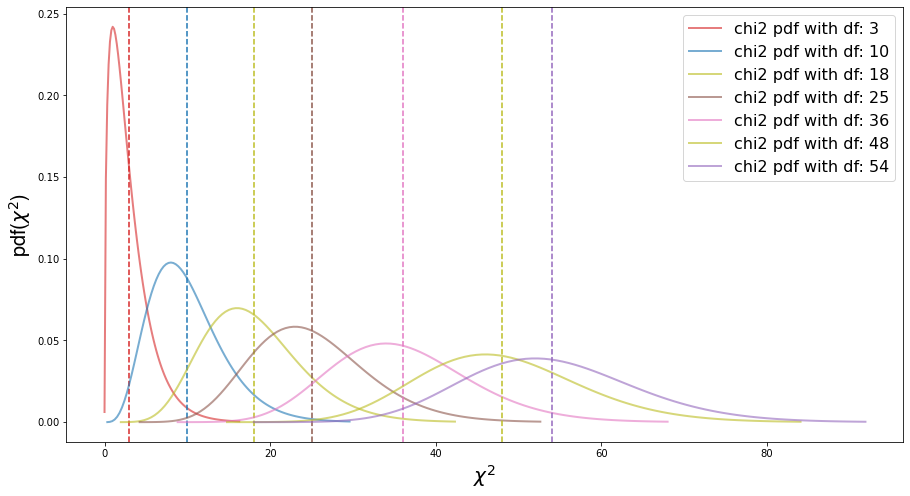

In [60]:
from scipy.stats import chi2
plt.figure(figsize=(15,8))

# Initialize an empty dictionary
chi2_stats_dict = {}

# Iterate through the degrees of freedom and compute the chi2 stats
for df in [3, 10, 18, 25, 36, 48, 54]:
    
    mean, var, skew, kurt = chi2.stats(df, moments='mvsk')

# Create a dictionary with the calculated stats rounded to desired precision
    stats_dict = {
        'mean': np.round(mean, 2),
        'variance': np.round(var, 2),
        'skewness': np.round(skew, 2),
        'kurtosis': np.round(kurt, 2)
    }

# Add the stats dictionary to the main dictionary with the degree of freedom as the key
    chi2_stats_dict[df] = stats_dict

# defining the range for chi2. what .ppf does is that it acts as reverse as cdf
# so chi2.ppf(0.01, df) says that what would be the value of chi2 when the probablity of occuring it is 1%
    x = np.linspace(chi2.ppf(0.000001, df), chi2.ppf(0.999, df), 100)
    plt.plot(x, chi2.pdf(x, df), color='C{}'.format(df), lw=2, alpha=0.6, label=f'chi2 pdf with df: {df}')
    
    plt.axvline(x = df, color='C{}'.format(df), linestyle='--')

plt.xlabel('$\chi^2$', fontdict=form_label)
plt.ylabel('pdf($\chi^2$)', fontdict=form_label)
plt.legend(fontsize=16)

# signal

## Comparing the simple and the original crystal_ball function

### $\eta$

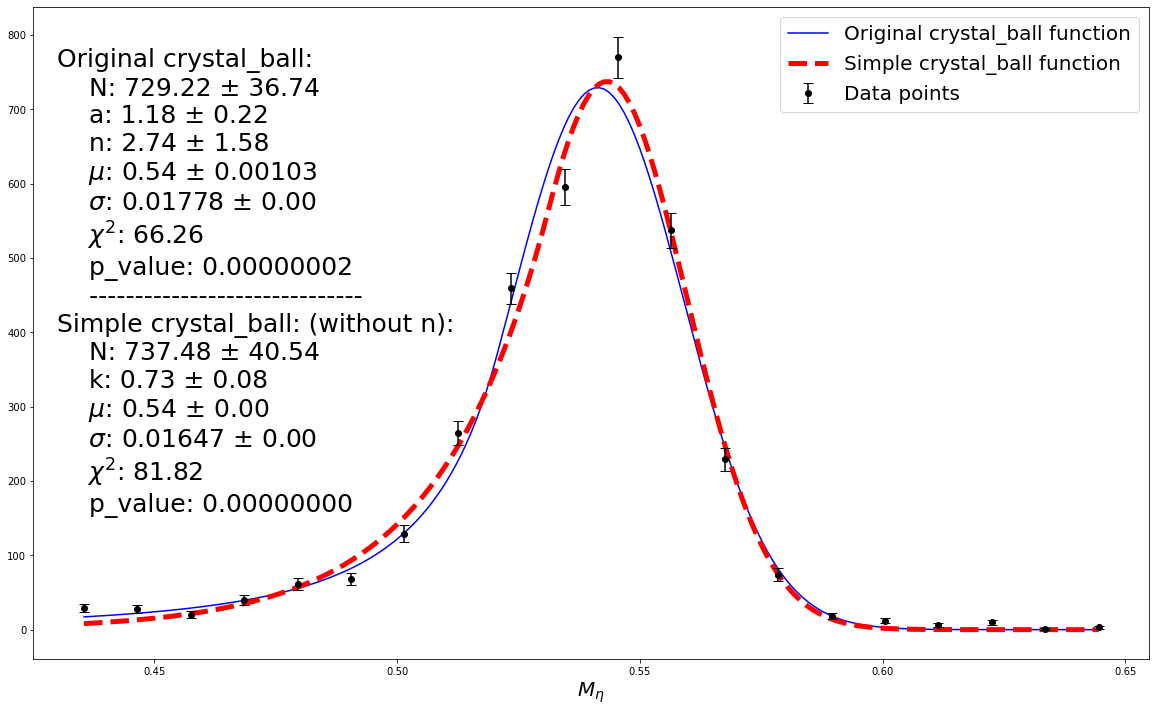

In [17]:
import warnings
warnings.filterwarnings('ignore')
exec(open('functions.py').read())

eta_x_sig = np.array((eta_edges[:-1]+eta_edges[1:])/2)
eta_y_sig =  np.array(eta_counts_sig)
eta_yerr_sig = np.sqrt(eta_y_sig)

(eta_xf_sig_orig,eta_yf_sig_orig),eta_parameters_sig_orig,eta_errors_sig_orig,eta_covp_sig_orig,eta_chi_sig_orig,eta_res_var_sig_orig = fit(crystal_ball, eta_x_sig,eta_y_sig, eta_yerr_sig)
(eta_xf_sig_simp,eta_yf_sig_simp),eta_parameters_sig_simp,eta_errors_sig_simp,eta_covp_sig_simp,eta_chi_sig_simp,eta_res_var_sig_simp = fit(simple_crystal_ball, eta_x_sig,eta_y_sig, eta_yerr_sig)
# popt, pcov ,info, msg, ier= curve_fit(crystal_ball,x_sig,y_sig, full_output=True,p0=get_default_params(x_sig,y_sig,crystal_ball))

plt.figure(figsize=(20,12))
plt.plot(eta_xf_sig_orig,eta_yf_sig_orig, color='b', label='Original crystal_ball function')
plt.plot(eta_xf_sig_simp,eta_yf_sig_simp, color='r', linestyle='dashed', linewidth=5,label='Simple crystal_ball function')
plt.errorbar(eta_x_sig, eta_y_sig, yerr=eta_yerr_sig, ls='', color='k', fmt='o', capsize=5, label='Data points')
plt.text(0.43,120, 
f'''Original crystal_ball:
    N: {eta_parameters_sig_orig[0]:.2f} \u00B1 {eta_errors_sig_orig[0]:.2f}
    a: {eta_parameters_sig_orig[1]:.2f} \u00B1 {eta_errors_sig_orig[1]:.2f}
    n: {eta_parameters_sig_orig[2]:.2f} \u00B1 {eta_errors_sig_orig[2]:.2f}
    $\mu$: {eta_parameters_sig_orig[3]:.2f} \u00B1 {eta_errors_sig_orig[3]:.5f}
    $\sigma$: {eta_parameters_sig_orig[4]:.5f} \u00B1 {eta_errors_sig_orig[4]:.2f}
    $\chi^2$: {eta_chi_sig_orig:.2f}
    p_value: {1 - stats.chi2.cdf(eta_chi_sig_orig, 15):.8f}
    {'-'*30}
Simple crystal_ball: (without n): 
    N: {eta_parameters_sig_simp[0]:.2f} \u00B1 {eta_errors_sig_simp[0]:.2f}
    k: {eta_parameters_sig_simp[1]:.2f} \u00B1 {eta_errors_sig_simp[1]:.2f}
    $\mu$: {eta_parameters_sig_simp[2]:.2f} \u00B1 {eta_errors_sig_simp[2]:.2f}
    $\sigma$: {eta_parameters_sig_simp[3]:.5f} \u00B1 {eta_errors_sig_simp[3]:.2f}
    $\chi^2$: {eta_chi_sig_simp:.2f}
    p_value: {1 - stats.chi2.cdf(eta_chi_sig_simp, 16):.8f}
    '''
    , fontsize=25
)
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.legend(fontsize='20')


### $\pi^0$

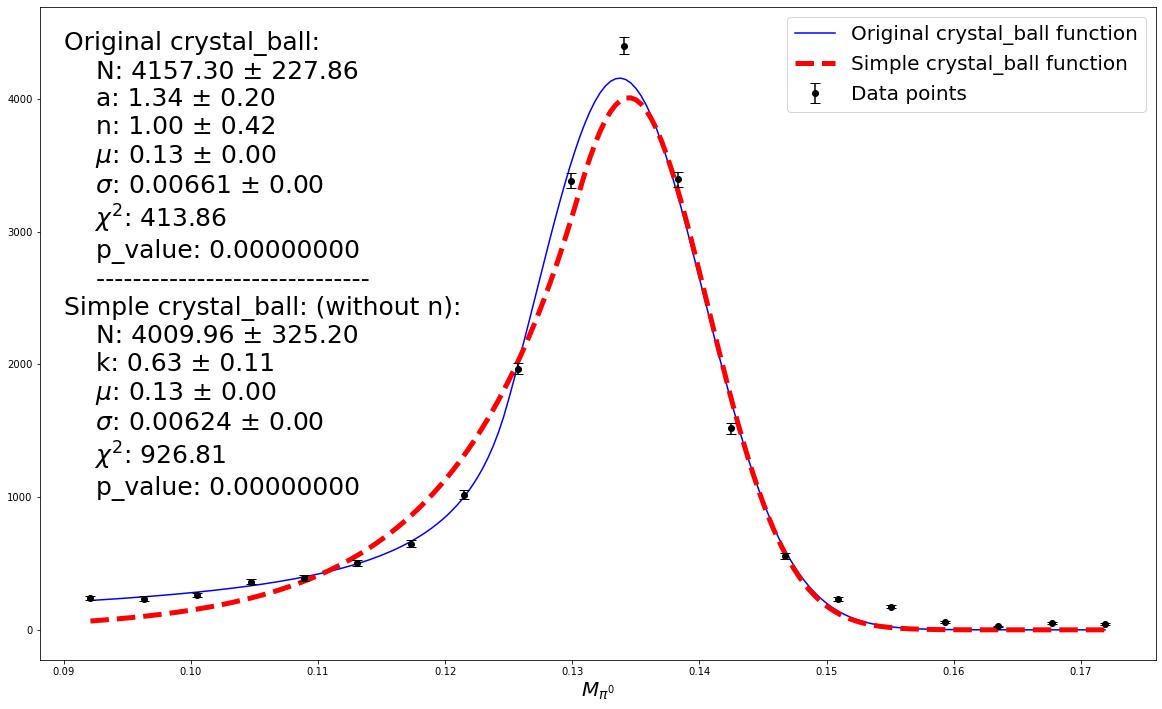

In [89]:
exec(open('functions.py').read())

pi0_x_sig = np.array((pi0_edges[:-1]+pi0_edges[1:])/2)
pi0_y_sig = np.array(pi0_counts_sig)
pi0_yerr_sig = np.sqrt(pi0_y_sig)

(pi0_xf_sig_orig,pi0_yf_sig_orig),pi0_parameters_sig_orig,pi0_errors_sig_orig,pi0_covp_sig_orig,pi0_chi_sig_orig,pi0_res_var_sig_orig = fit(crystal_ball, pi0_x_sig,pi0_y_sig, pi0_yerr_sig)
(pi0_xf_sig_simp,pi0_yf_sig_simp),pi0_parameters_sig_simp,pi0_errors_sig_simp,pi0_covp_sig_simp,pi0_chi_sig_simp,pi0_res_var_sig_simp = fit(simple_crystal_ball, pi0_x_sig,pi0_y_sig, pi0_yerr_sig)
# popt, pcov ,info, msg, ier= curve_fit(crystal_ball,x_sig,y_sig, full_output=True,p0=get_default_params(x_sig,y_sig,crystal_ball))

plt.figure(figsize=(20,12))
plt.plot(pi0_xf_sig_orig,pi0_yf_sig_orig, color='b', label='Original crystal_ball function')
plt.plot(pi0_xf_sig_simp,pi0_yf_sig_simp, color='r', linestyle='dashed', linewidth=5,label='Simple crystal_ball function')
plt.errorbar(pi0_x_sig, pi0_y_sig, yerr=pi0_yerr_sig, ls='', color='k', fmt='o', capsize=5, label='Data points')
plt.text(0.09,800, 
f'''Original crystal_ball:
    N: {pi0_parameters_sig_orig[0]:.2f} \u00B1 {pi0_errors_sig_orig[0]:.2f}
    a: {pi0_parameters_sig_orig[1]:.2f} \u00B1 {pi0_errors_sig_orig[1]:.2f}
    n: {pi0_parameters_sig_orig[2]:.2f} \u00B1 {pi0_errors_sig_orig[2]:.2f}
    $\mu$: {pi0_parameters_sig_orig[3]:.2f} \u00B1 {pi0_errors_sig_orig[3]:.2f}
    $\sigma$: {pi0_parameters_sig_orig[4]:.5f} \u00B1 {pi0_errors_sig_orig[4]:.2f}
    $\chi^2$: {pi0_chi_sig_orig:.2f}
    p_value: {1 - stats.chi2.cdf(pi0_chi_sig_orig, 15):.8f}
    {'-'*30}
Simple crystal_ball: (without n): 
    N: {pi0_parameters_sig_simp[0]:.2f} \u00B1 {pi0_errors_sig_simp[0]:.2f}
    k: {pi0_parameters_sig_simp[1]:.2f} \u00B1 {pi0_errors_sig_simp[1]:.2f}
    $\mu$: {pi0_parameters_sig_simp[2]:.2f} \u00B1 {pi0_errors_sig_simp[2]:.2f}
    $\sigma$: {pi0_parameters_sig_simp[3]:.5f} \u00B1 {pi0_errors_sig_simp[3]:.2f}
    $\chi^2$: {pi0_chi_sig_simp:.2f}
    p_value: {1 - stats.chi2.cdf(pi0_chi_sig_simp, 16):.8f}
    '''
    , fontsize=25
)
plt.xlabel('$M_{\pi^0}$', fontdict=form_label)
plt.legend(fontsize='20')

In [72]:
pi0_x_sig[pi0_y_sig.argmax()]

0.13409858416667528

(array([ 1.46757255e+02,  2.03395898e+00, -8.51823069e+00,  5.24252447e-01,
         4.36353729e-02]),
 array([0.43549989, 0.44649936, 0.45749884, 0.46849831, 0.47949779,
        0.49049726, 0.50149673, 0.51249621, 0.52349568, 0.53449516,
        0.54549463, 0.55649411, 0.56749358, 0.57849305, 0.58949253,
        0.600492  , 0.61149148, 0.62249095, 0.63349042, 0.6444899 ]))

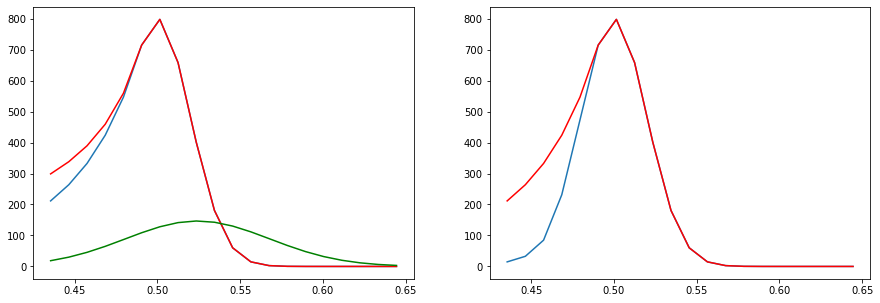

In [200]:
# checking how the crystal_ball function would change by changing the parameters
x = eta_x_bkg
param = N, a, n1, mu, sigma
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x, crystal_ball([800,0.5,5,0.5,0.02], x))
plt.plot(x, crystal_ball([800,0.5,1,0.5,0.02], x), color='r')
plt.plot(x, crystal_ball(eta_parameters_sig_orig, x), color='g')

plt.subplot(122)
plt.plot(x, crystal_ball([800,2,5,0.5,0.02], x))
plt.plot(x, crystal_ball([800,0.5,5,0.5,0.02], x), color='r')

eta_parameters_sig_orig, eta_x_sig

array([1.01783497, 1.00190914])

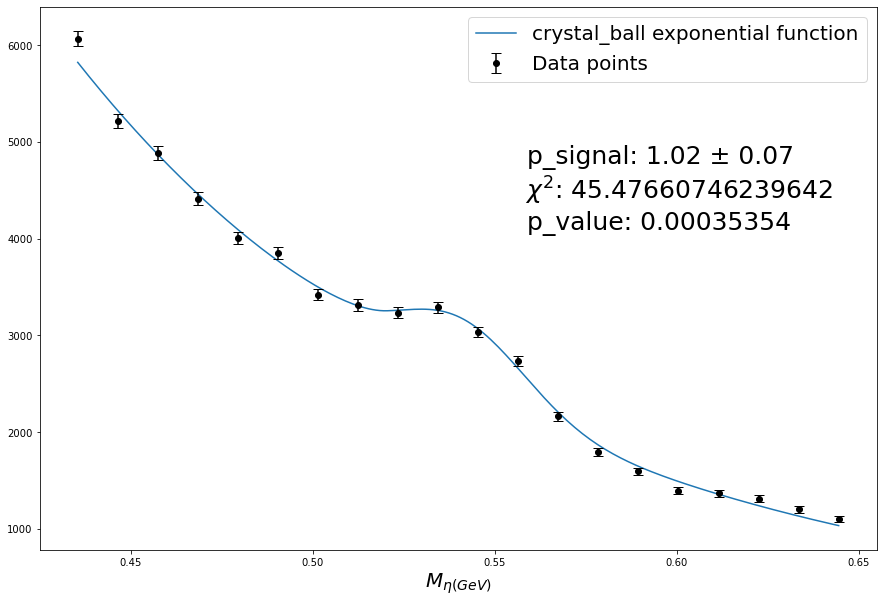

In [16]:
exec(open('functions.py').read())


def expocrys(params, x):
    p1, p2 = params
    return p1 * (crystal_ball(eta_parameters_sig_orig, x)) + p2 * (expo(eta_parameters_bkg, x))

def expocrys3(params, x):
    p1 = params
    return p1 * (crystal_ball(eta_parameters_sig_orig, x)) + (expo(eta_parameters_bkg, x))


# expocrys2 = lambda x, p1, p2: p1 * (crystal_ball(eta_parameters_sig_orig, x)) + p2 * (expo(eta_parameters_bkg, x))


# (eta_xf, eta_yf), eta_parameters, eta_errors, eta_pcov, eta_chi, eta_res_var = fit(expocrys, eta_x_data, eta_y_data, eta_yerr, default_pars=[0.06,0.94])
(eta_xf3, eta_yf3), eta_parameters3, eta_errors3, eta_pcov3, eta_chi3, eta_res_var3 = fit(expocrys3, eta_x_data, eta_y_data, eta_yerr, default_pars=[1])

popt, pcov = curve_fit(expocrys2, eta_x_data, eta_y_data)

plt.figure(figsize=(15,10))
plt.plot(eta_xf3, eta_yf3, label= 'crystal_ball exponential function')
plt.errorbar(eta_x_data, eta_y_data, yerr=eta_yerr, ls='', color='k', fmt='o', capsize=5, label='Data points')
plt.text( 0.55,3800,
f'''
    p_signal: {eta_parameters3[0]:.2f} \u00B1 {eta_errors3[0]:.2f}
    $\chi^2$: {eta_chi3}
    p_value: {1 - stats.chi2.cdf(eta_chi3, 18):.8f}
'''
    ,fontsize=25
)
plt.xlabel('$M_{\eta (GeV)}$', fontdict=form_label)
plt.legend(fontsize='20')
popt

In [211]:
eta_parameters

array([1.02592245, 0.99974052])

In [238]:
integrate.quad(expocrys2, np.min(eta_x_data), np.max(eta_x_data), args = (eta_parameters[0], eta_parameters[1]))[0]

614.7143237100704